<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2019 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Friday October 11**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |[Bottom](#bot)

---

In [60]:
from scipy import stats
from random import randint
import random
from scipy.special import binom
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

### [30 points] Problem 1: Rubber Ducky Race

Every year, the Aspen Valley Rotary Club hosts a [rubber ducky race](https://www.aspenrotary.org/page/the-ducky-derby). Each Rubber Ducky is stamped with a number, tickets are sold  and if your ducky makes it to the end of the course first, you win. Exact Rules follow:

1. The Rotary Club sells "Duck Adoption" papers. Only Ducks that have been adopted start the race, so there must always be a winner.
2. The ducks are dumped into a river and race to a finish line. The adoptive parent of the first duck across the line wins. The standard prize is 15,000 dollars.
3. Before the start of the duck race, the Rotary Club randomly draws a number of special ducks. For every 3,333 ducks that start the race, 1 special duck is drawn.
4. If a special duck wins the race the prize is increased from 15,000 dollars to 1,000,000 dollars.

**Assume that all ducks are equally likely to win the ducky race.**

**Part A:**
Given that 9999 ducks start the race and you purchase 1 duck, calculate the probability by hand that your duck is selected as a special ducky.

3/9999 = 1/3333

**Part B:** Calculate the probability that the rotary club pays out the million dollar prize.

3/9999 = 1/3333

**Part C:** Calculate the probability that your duck is both picked as a special duck and wins the race.

Since the status of being a special duck does not change win probability, they are independant  
Therefore, P(Special and Win) = P(Special)P(Win) = 1/3333\*(1/9999) = 1/33326667‬

**Part D:** Calculate the expected payout for the Rotary Club for a 9999 duck race. 

E\[P\] = 1/3333\8\*1000000+3332/3333\*15000 = 300.03+14995.50 = 15,295.53

**Part E:** The Rotary Club takes out an insurance policy on having to pay the 1,000,000 dollar prize. They pay $500 per duck race to the insurance company. From your answer above, is this worth it? Explain. Is there any number of ducks that make the insurance policy a good deal? If it is not worth it, what's a reason the the Rotary Club might buy the policy anyways? 

This is not worth it, since you expect the million-dollar offer to cost an average of 300.03 dollars per race  
There is no amount of ducks that make it worth it. Since the special duck count is rounded down, the closest to worth it you can get it when num_ducks%3333=0, which is the case with 9999.  
They might buy the policy anyway given the case where \$500 is small cash relative to the event and $1,000,000 is crippling

**Part F:** Write a python function that simulates a single duck race. It should use the api below and the class written for you. DO NOT CHANGE THE API OR THE ENUMERATED CLASS. The function should take the number of ducks that start the race in as a parameter, and return a tuple of the duck's number that won, and the type of winner that duck was. 

[E.g. (1522, <Types_Of_Winner.REGULAR: 0>) ] 

The duck numbers start at 1 and go until the number passed in (Eg. For 500 ducks, the ducks are numbered 1 to 500. No Duck is numbered 0).

In [61]:
from enum import Enum
#Dont change this. You should return a tuple of (int, Type_Of_Winner) in the function below. 
#The type of winner should be from this class. The int should represent the duck number of the winning duck.
#If you want more info about Enumerated Types in python: https://docs.python.org/3/library/enum.html
class Types_Of_Winner(Enum):
    REGULAR = 0
    SPECIAL = 1

#don't change this api. We will use a set of unit tests to test this. 
#This uses a default parameter. If you are unfamiliar with default parameters: 
#https://www.geeksforgeeks.org/default-arguments-in-python/ 
#Don't change the default parameter.
def rubber_Ducky_Race(number_Of_Ducks=3333):
    winning_Duck_Number = random.randint(1,number_Of_Ducks)
    special_Ducks=random.sample(range(1,number_Of_Ducks), math.floor(number_Of_Ducks/3333))
    if winning_Duck_Number not in special_Ducks:
        type_Of_Winner = Types_Of_Winner.REGULAR
    else:
        type_Of_Winner = Types_Of_Winner.SPECIAL
    
    #you can change the variable names, but must return tuple of type (int, Types_Of_Winner)
    return (winning_Duck_Number, type_Of_Winner)
    

**Part G:** Write a python function that takes in a number of duck races (num_Duck_Races) and a number of ducks per race (num_Ducks_Per_Race). The function should run the function you wrote in part F by passing the number of ducks to the function from part F. It should run the function from part F num_Duck_Races times, and record all the results. It then should calculate the amount of money the rotary club paid out in each race and return a list of the rotary club's payouts (integer values of dollars paid out). Don't change the API as we will be auto grading this.

In [62]:
#Don't change this api. Use the parameters passed in in your implemenation of this function.
def run_Simulation_Duck_Race(num_Duck_Races, num_Ducks_Per_Race):
    payout_List = []
    for i in range(num_Duck_Races):
        race_Result = rubber_Ducky_Race(num_Ducks_Per_Race)
        if (race_Result[1] == Types_Of_Winner.REGULAR):
            payout_List.append(15000)
        else:
            payout_List.append(1000000)
    return payout_List

**Part H:** Run the simulation function you made in part G 50 times for 1111 duck races each with 3333 ducks per race. Calculate the mean of each list of payouts returned by your function from part F and plot the mean payout values on a histogram. We recommend using the default bins argument here (don't pass it in). Make sure to make your histogram legible, label the plot, and label the x and the y axes (with their units). Do this all in one cell and run the cell a few times and see what different histograms are generated from the simulations. When you find one with three distinct "bars" leave it in the output of the cell. Explain why this histogram makes sense. Your answer here should talk about what each distinct "bar" in the histogram represents, the probabiity that the rotary club pays out the million dollar prize, and the number of races in each simulation. 

Text(0,0.5,'Frequency')

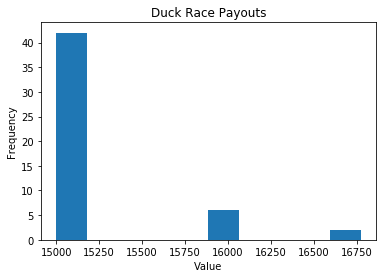

In [66]:
mean_List = []
for i in range(50):
    result = run_Simulation_Duck_Race(1111, 3333)
    mean_List.append(sum(result)/len(result))
plt.hist(mean_List)
plt.title("Duck Race Payouts")
plt.xlabel("Value")
plt.ylabel("Frequency")

The first bar, at 15000, is all simulations that had no special ducks win, causing a mean of 15000. The next, around 15900, is all simulations with one special duck winner, causing a mean of 15887. The next is two special duck winners, and so on.

**Part I:** Pick a lucky number in between 1 and 7000 and run your function from part F 25000 times with 7,000 ducks. Capture all the results and find the number of times your duck won! Was your duck ever a winner or even a special Million Dollar Winner?

In [56]:
lucky_Number = 1337
regular_Wins = 0
special_Wins = 0
for i in range(25000):
    result = rubber_Ducky_Race(7000)
    if (result[0] == lucky_Number):
        if (result[1] == Types_Of_Winner.REGULAR):
            regular_Wins += 1
        else:
            special_Wins += 1
print("Regular wins: " + str(regular_Wins))
print("Special wins: " + str(special_Wins))

Regular wins: 5
Special wins: 0


My duck won 5 times, all as a regular duck

<br>

---
[Back to top](#top)
<a id='p2'></a>

### [20 points] Problem 2: Tax Fraud

Let $X =$ the leading digit of a randomly selected number from a large accounting ledger. So, for example, if we randomly draw the number $\$20,695$, then $X = 2$. People who make up numbers to commit accounting fraud tend to give $X$ a (discrete) uniform distribution, i.e., $P(X = x) = 1/9$, for $x \in \{1,...,9\}$. However, there is empirical evidence that suggests that "naturally occurring" numbers (e.g., numbers in a non-fraudulent accounting ledger) have leading digits that do not follow a uniform distribution. Instead, they follow a distribution defined by:

\begin{align*}
f(x) = \log_{10}\bigg(\frac{x+1}{x}\bigg), \,\,\,\, x = 1,2,...,9.
\end{align*} 

Using ${\tt tax.txt}$, a dataset containing the taxable incomes for individuals in 1978, we will decide whether this dataset is fraudulent. 



**Part A**:  Read in the data and create a variable that holds only the character of each data point.

In [104]:
with open("tax.txt", newline='') as tax_data:
    first_nums = []
    expected_nums = []
    total_nums = 0
    tax_info = csv.reader(tax_data, delimiter='\t')
    for item in tax_info:
        total_nums+=1
        num = item[1]
        first_nums.append(int(num[0]))
    for i in range(1, 10):
        density = math.log(((i+1)/i), 10)
        im_sorry = int(density * total_nums)
        for j in range(im_sorry):
            expected_nums.append(i)

first_nums contains all first digits

**Part B**: Create a histogram of the data that also plots or overlays the suggested non-fradulent density $f(x)$ as well as the density of the discrete uniform over the same support.

Text(0,0.5,'Frequency')

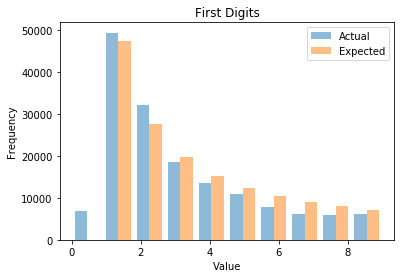

In [105]:
    l1 = list()
    plt.hist([first_nums, expected_nums], alpha = 0.5, label = ["Actual", "Expected"])
    plt.legend()
    plt.title("First Digits")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

**Part C**: Does it appear as those the data is fraudulent, not fraudulent, or too hard to tell?  What kind of numerical measures could you use to support such a conclusion?

This data appears fraudulent. This could be supported by comparing (actual density - expected fraudulent density) vs (actual density vs expected legitimate density) for each digit

**Part D**: Create a new object that stores only the first digit of the first 100 distinct powers of 2, e.g. $Y=[2, 2^2, 2^3, 2^4, \dots ]$.  Repeat steps a) and b) for this new data set, plotting the distribution of the first digit of terms in $Y$ against $f(x)$.

Text(0,0.5,'Frequency')

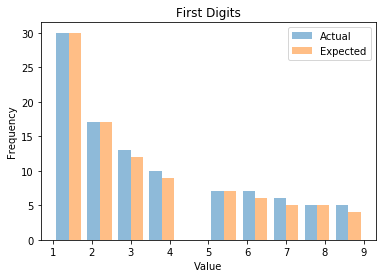

In [108]:
first_digits = []
expected_digits = []
for i in range(1, 101):
    num = 2 ** i
    while num >= 10:
        num = num/10
    num = int(num)
    first_digits.append(num)
for i in range(1, 10):
    density = math.log(((i+1)/i), 10)
    expected = int(density * 100)
    for j in range(expected):
        expected_digits.append(i)
l1 = list()
plt.hist([first_digits, expected_digits], alpha = 0.5, label = ["Actual", "Expected"])
plt.legend()
plt.title("First Digits")
plt.xlabel("Value")
plt.ylabel("Frequency")

<br>

---
[Back to top](#top)
<a id='p3'></a>

### [30 points] Problem 3: Poker

It's time to play poker.  (https://en.wikipedia.org/wiki/Texas_hold_%27em#Hand_values) Assume that we are using a standard deck of cards without jokers (52 cards). For each round, you will be dealt 5 cards from the deck without replacement. There are several different types of hands that can be dealt; listed below are a few of interest: 

- Highcard (Simple value of the card. Lowest: 2 - Highest: Ace)
- Pair (Two cards with the same value)
- Two pair (Twice two cards with the same value)
- Three of a kind (Three cards with the same value)
- Straight (Sequence of 5 cards in increasing value, Ace can only follow K)
- Four of a kind (Four cards with the same value)
- Full house (Three of a kind and a pair)
- Flush (5 cards of the same suit)

**Part A**: What is the exact probability you get at least a Pair in your 5 cards? What is the probability of getting a Full House?  (Note that we're including pairs as a subset of a full house, here)

Number of possible hands: 52 choose 5 = 2598960  
Pair: 13\*4 choose 2\*12 choose 3\*(4 choose 1)^3 = 1098240. 1098240/2598960 = 0.423  
Full house: 13\*4 choose 3\*12\*4 choose 2 = 3744. 3744/2598960 = 0.00144

**Part B**: Write a function `getCards()` to randomly generate 5 cards from the no-joker deck. This function should return an array of 5 cards.

In [171]:
class Card:
    def __init__(self, rank, suit):
        self.rank=rank
        self.suit=suit

def getCards():
    deck = []
    return_deck = []
    for i in range(13):
        for j in range (4):
            deck.append(Card(i, j))
    for i in range(5):
        rand_card = random.randint(0, 51-i)
        return_deck.append(deck.pop(rand_card))
    return return_deck

**Part C**: Run the `getCards()` simulation 10000 times, and store the result in an array named `card_array`.

In [180]:
card_array = []
for i in range(10000):
    card_array.append(getCards())

**Part D**: Write a function `pair(card_array, num_sim)` For the 10000 simulations we did in Part C, what is the probability of have Pair? Does the result agree with your calculation in Part A?

In [181]:
def pair(card_array, num_sim):
    pair_count = 0
    for hand in card_array:
        hand_ranks = []
        for card in hand:
            hand_ranks.append(card.rank)
        if (len(hand_ranks) == len(set(hand_ranks))+1):
            pair_count += 1
    print("The calculated probability of a pair was " + str(pair_count/10000))
    print("The expected probability of a pair was " + str(num_sim))
    error = 100 * (abs(num_sim-(pair_count/10000))/num_sim)
    print("The percent error is " + str(error))
    print("At the time of running, this error value was within the 5% threshold to be considered accurate")
    
pair(card_array, 0.423)

The calculated probability of a pair was 0.426
The expected probability of a pair was 0.423
The percent error is 0.7092198581560291
At the time of running, this error value was within the 5% threshold to be considered accurate


**Part E:** Write a function `fullhouse(card_array, num_sim)` For the 10000 simulations we did in Part C, what is the probability of having a Full House? Does the result agree with your calculation in Part A?

In [183]:
def fullhouse(card_array, num_sim):
    fh_count = 0
    for hand in card_array:
        hand_ranks = []
        hand_suits = []
        unique_ranks = []
        for card in hand:
            hand_ranks.append(card.rank)
            hand_suits.append(card.suit)
        unique_ranks = set(hand_ranks)
        if (len(unique_ranks) == 2 and hand_ranks.count(hand_ranks[0]) in [2, 3]):
            print(str(hand_ranks) + str(hand_suits))
            fh_count += 1
    print("The calculated probability of a full house was " + str(fh_count/10000))
    print("The expected probability of a full house was " + str(num_sim))
    error = 100 * (abs(num_sim-(fh_count/10000))/num_sim)
    print("The percent error is " + str(error))
    print("At the time of running, this error value was not within the 5% threshold to be considered accurate")
    
fullhouse(card_array, 0.00144)

[12, 12, 12, 3, 3][0, 2, 1, 1, 3]
[3, 0, 3, 0, 0][0, 1, 1, 0, 2]
[0, 9, 0, 9, 9][3, 1, 2, 2, 3]
[9, 3, 9, 9, 3][3, 0, 1, 2, 2]
[3, 8, 8, 3, 3][2, 1, 2, 0, 3]
[12, 3, 12, 3, 12][0, 2, 1, 3, 3]
[11, 11, 11, 10, 10][3, 0, 1, 2, 3]
[2, 10, 10, 2, 2][3, 0, 2, 1, 0]
[1, 1, 5, 5, 1][3, 0, 0, 1, 2]
[0, 8, 0, 8, 0][1, 1, 0, 2, 3]
[2, 5, 5, 5, 2][2, 2, 3, 0, 1]
[6, 6, 6, 12, 12][1, 0, 3, 1, 3]
[7, 7, 9, 7, 9][0, 3, 1, 1, 3]
[4, 11, 11, 4, 4][1, 1, 2, 0, 2]
[11, 11, 10, 10, 10][1, 2, 0, 1, 2]
[1, 4, 4, 1, 1][0, 1, 2, 1, 3]
[7, 0, 7, 0, 7][2, 0, 3, 3, 0]
[5, 12, 12, 12, 5][2, 3, 0, 2, 3]
[2, 2, 4, 4, 2][1, 2, 2, 0, 3]
The calculated probability of a full house was 0.0019
The expected probability of a full house was 0.00144
The percent error is 31.944444444444436
At the time of running, this error value was not within the 5% threshold to be considered accurate


In 10000 trials, you are only expected to get 14 full houses, which is a small sample size and causes a large standard deviation. This error is likely to not be within 5% due to this. With 500000 trials, the percent error lowered to around 1.5% on average